<a href="https://colab.research.google.com/github/ankur416/Bharatintern/blob/main/B_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.dropna(inplace=True)
data.duplicated('CustomerId').sum()

0

In [4]:
data.set_index('CustomerId',inplace=True)
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.drop('Surname',axis=1,inplace=True)

In [6]:
geo = data['Geography'].unique()
geo

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
gen = data['Gender'].unique()
gen

array(['Female', 'Male'], dtype=object)

In [8]:
def encode(ar,x):
    return np.where(ar==x)

In [9]:
data['Geography'] = data['Geography'].apply(lambda x: encode(geo,x)[0][0])
data['Gender'] = data['Gender'].apply(lambda x: encode(gen,x)[0][0])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,1,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [11]:
data['NumProds'] = data['Num Of Products'].apply(lambda x : 1*(x>1))
data.drop('Num Of Products',axis=1,inplace = True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn,NumProds
CustomerId,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,101348.88,1,0
15647311,608,1,0,41,1,83807.86,0,1,112542.58,0,0
15619304,502,0,0,42,8,159660.80,1,0,113931.57,1,1
15701354,699,0,0,39,1,0.00,0,0,93826.63,0,1
15737888,850,1,0,43,2,125510.82,1,1,79084.10,0,0


In [12]:
data['Tenure'].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [13]:
data['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [14]:
data['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [15]:
data['Estimated Salary'].mean()

100090.239881

In [16]:
data.loc[(data['Balance']==0),'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [17]:
data['HasZeroBalance'] = data['Balance'].apply(lambda x : 1*(x==0))
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn,NumProds,HasZeroBalance
CustomerId,,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,101348.88,1,0,1
15647311,608,1,0,41,1,83807.86,0,1,112542.58,0,0,0
15619304,502,0,0,42,8,159660.80,1,0,113931.57,1,1,0
15701354,699,0,0,39,1,0.00,0,0,93826.63,0,1,1
15737888,850,1,0,43,2,125510.82,1,1,79084.10,0,0,0


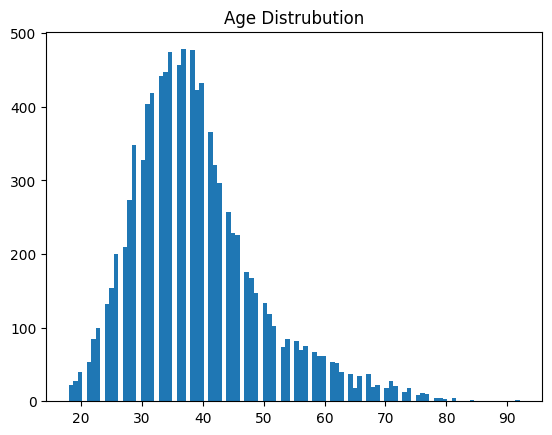

In [18]:
plt.hist(data['Age'],bins=100)
plt.title('Age Distrubution')
plt.show()

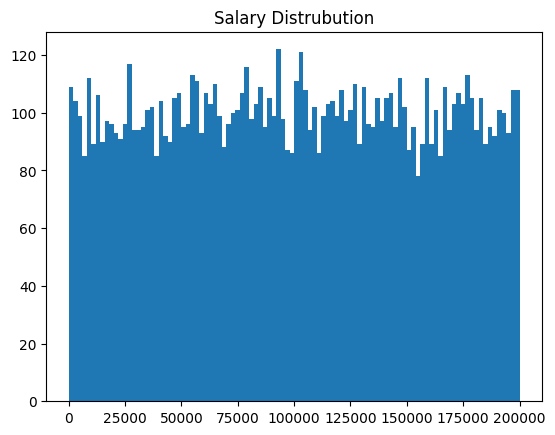

In [19]:
plt.hist(data['Estimated Salary'],bins=100)
plt.title('Salary Distrubution')
plt.show()

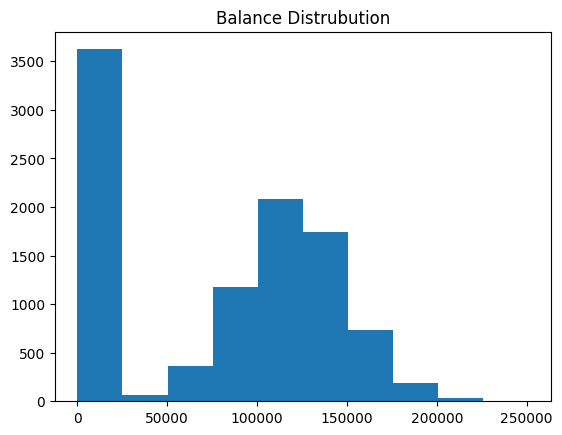

In [20]:
plt.hist(data['Balance'])
plt.title('Balance Distrubution')
plt.show()

In [21]:
import imblearn

In [22]:
X = data.drop('Churn',axis=1)
y = data['Churn']
print('No. of Records:',y.shape)
y.value_counts()

No. of Records: (10000,)


,count
Churn,
0,7963
1,2037


In [23]:
oversample = imblearn.over_sampling.SMOTE()
X, y = oversample.fit_resample(X, y)
print('No. of Records:',y.shape)
y.value_counts()

No. of Records: (15926,)


,count
Churn,
1,7963
0,7963


In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
Scaler = StandardScaler()
X_train[['CreditScore','Age','Tenure','Estimated Salary']] = Scaler.fit_transform(X_train[['CreditScore','Age','Tenure','Estimated Salary']])
X_test[['CreditScore','Age','Tenure','Estimated Salary']] = Scaler.transform(X_test[['CreditScore','Age','Tenure','Estimated Salary']])

In [29]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,NumProds,HasZeroBalance
1270,0.817176,2,1,-1.103348,0.793152,115315.040000,1,0,-1.481472,0,0
15192,0.543117,0,0,-0.501681,0.793152,0.000000,1,0,0.226739,0,1
14982,-0.213285,0,0,-0.401403,1.527209,99390.235300,0,1,-1.311954,0,0
1501,0.126548,0,0,-1.003070,0.793152,144162.300000,1,1,-1.494071,1,0
13496,0.521193,2,0,-0.000291,-1.041988,109044.818381,1,0,0.341067,1,0


In [30]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
svm = SVC()
svm.fit(X_train,y_train)
y_ = svm.predict(X_test)

In [31]:
print(classification_report(y_test,y_))
confusion_matrix(y_test,y_)

              precision    recall  f1-score   support

           0       0.61      0.39      0.47      2648
           1       0.55      0.75      0.63      2608

    accuracy                           0.57      5256
   macro avg       0.58      0.57      0.55      5256
weighted avg       0.58      0.57      0.55      5256



array([[1024, 1624],
       [ 651, 1957]])

In [33]:
from sklearn.model_selection import GridSearchCV
p_g = {'C':[0.1,1,10],
      'gamma':[1,0.1,0.01],
       'kernel':['rbf'],
       'class_weight':['balanced']
      }
grid = GridSearchCV(SVC(),p_g,refit=True,verbose = 2,cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [34]:
y_ = grid.predict(X_test)
print(classification_report(y_test,y_))
confusion_matrix(y_test,y_)

              precision    recall  f1-score   support

           0       0.78      0.42      0.54      2648
           1       0.60      0.88      0.71      2608

    accuracy                           0.65      5256
   macro avg       0.69      0.65      0.63      5256
weighted avg       0.69      0.65      0.63      5256



array([[1101, 1547],
       [ 309, 2299]])

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [36]:
X_train = X_train.iloc[:, :-1].values
y_train = y_train.iloc[:].values
X_test = X_test.iloc[:, :-1].values
y_test = y_test.iloc[:].values

In [37]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((10670, 10), (10670,), (5256, 10), (5256,))

In [38]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5777 - loss: 252.4150 - val_accuracy: 0.5665 - val_loss: 269.0420
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6064 - loss: 203.2623 - val_accuracy: 0.5642 - val_loss: 27.1793
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6207 - loss: 137.9608 - val_accuracy: 0.6593 - val_loss: 312.0969
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6376 - loss: 101.6369 - val_accuracy: 0.6598 - val_loss: 83.1177
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6196 - loss: 166.7237 - val_accuracy: 0.6607 - val_loss: 249.3400
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6245 - loss: 117.3823 - val_accuracy: 0.6603 - val_loss: 26.4293
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6326 - loss: 153.5727 - val_accuracy: 0.6598 - val_loss: 65.6751
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6373 - loss: 9

In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5884 - loss: 6.4991
Test Accuracy: 0.5890411138534546
